# Student Performance in Exams
This dataset provides a detailed snapshot of high school students' performance in exams, focusing on their scores in mathematics, reading, and writing. It includes essential demographic, social, and academic variables that are known to influence academic outcomes. The dataset consists of 1,000 observations, where each row represents a unique student, and includes various attributes such as gender, race/ethnicity, parental education levels, test preparation status, lunch type, and scores in three key academic subjects. This dataset can be leveraged to analyze trends, correlations, and disparities in academic performance based on socioeconomic and educational factors.

Source: [https://www.kaggle.com/datasets/timothyadeyemi/students-performance-in-exams](https://www.kaggle.com/datasets/timothyadeyemi/students-performance-in-exams)

## Feature descriptions
| Attribute | Description |
|---|---|
|Gender| 	This column categorizes students by their gender (Male, Female). Allows for the exploration of gender-based performance trends in math, reading, and writing scores.|
|Race/Ethnicity|Coded into five groups (Group A to Group E), this feature represents the racial or ethnic background of the student. Enables analysis of how ethnic backgrounds influence exam performance.|
|Parental Level of Education|Describes the highest educational attainment of the student’s parents (e.g., High School, Some College, Associate’s Degree, Bachelor’s Degree, Master’s Degree). This variable is useful in understanding the impact of parental education on students' academic achievements.|
|Lunch Type|Indicates whether the student receives a standard lunch or a free/reduced-price lunch. This feature can be used to study the relationship between socioeconomic status and academic performance.|
|Test Preparation Course|Describes whether the student completed a test preparation course (Completed or None). Examines the influence of structured test preparation on academic outcomes.|
|Math Score|This column records the student’s performance in mathematics (on a scale of 0-100). A key outcome variable for assessing performance in a core subject.|
|Reading Score|Similar to the math score, this feature captures the student’s performance in reading (on a scale of 0-100). Provides insight into students' literacy and comprehension abilities.|
|Writing Score|Represents the student’s performance in writing (on a scale of 0-100). Allows for analysis of written communication skills and overall language proficiency.|

## 1. Prepare the dataset
### 1.1 Read and treat missing values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

# Check if the dataset contains any placeholder values
print("\nChecking for placeholder values:")
placeholders = ['?', 'N/A', 'NA', 'None', '']

for placeholder in placeholders:
    print(f"Number of '{placeholder}' entries in each column:")
    print((df == placeholder).sum())


Checking for placeholder values:
Number of '?' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'N/A' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'NA' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'None' e

It is good practice to look at whether the dataset to be analyzed has missing data. If it does, it can be filled with random values ​​similar to the other features, or the row can be deleted completely. In this case, there is no data loss.

### 1.2 Encode features

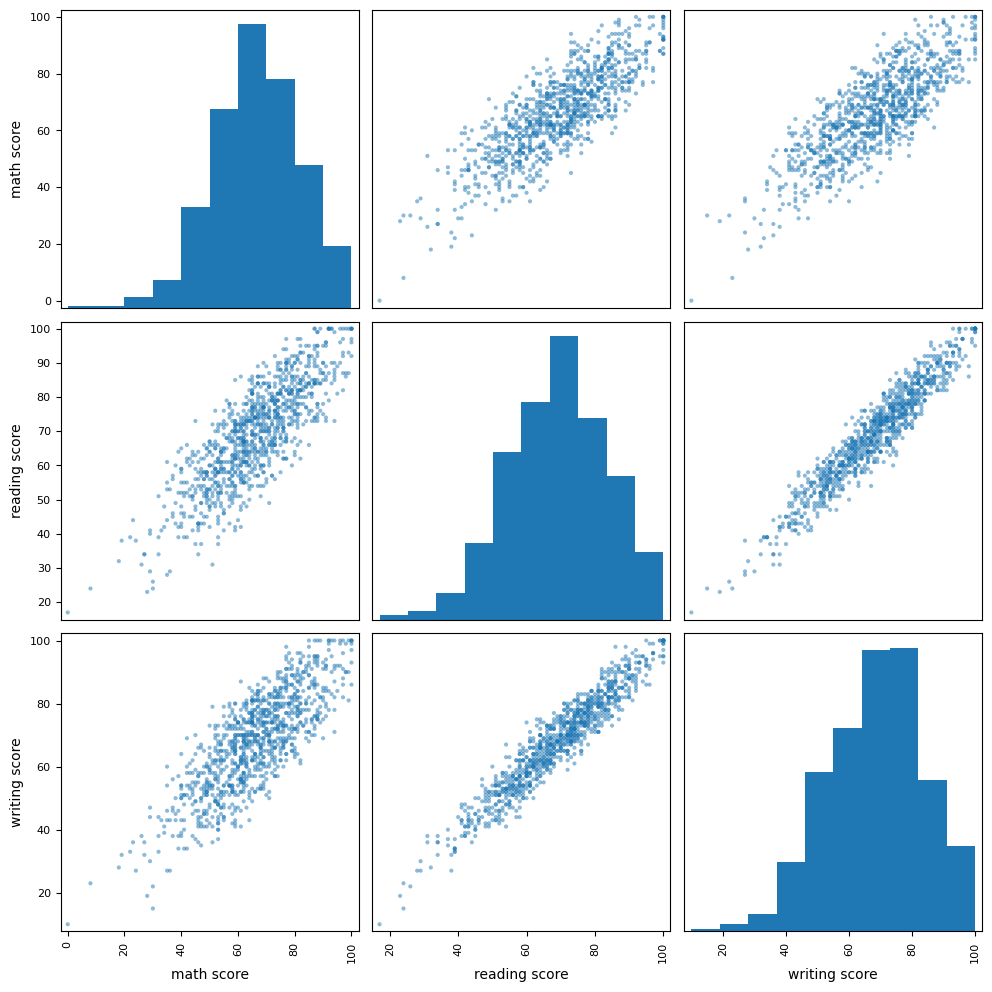

In [6]:
pd.plotting.scatter_matrix(df, figsize=(10,10));
plt.tight_layout(pad=1.0) 

As can be seen in the previous plot, only the numerical features (Math Score, Reading Score and Writing Score) have been taken into account to perform the scatter matrix. However, non numerical features (Gender, Race/Ehnicity, Parental Level of Education, Lunch Type and Test Preparation Course) have not. Therefore, it's necessary to convert this categorical features into numerical in order to perform the analysis correctly.

In the following code, one hot encoding.

|One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.|
|---|

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original dataframe
df_encoded = df.copy()

# Use pd.get_dummies() to one-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df_encoded = df_encoded.astype(int)
#print(df_encoded)


     math score  reading score  writing score  gender_male  \
0            72             72             74            0   
1            69             90             88            0   
2            90             95             93            0   
3            47             57             44            1   
4            76             78             75            1   
..          ...            ...            ...          ...   
995          88             99             95            0   
996          62             55             55            1   
997          59             71             65            0   
998          68             78             77            0   
999          77             86             86            0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                       0                       0   
1                         0                       1                       0   
2                 

### 1.3 Look for outliers
The goal of the analysis will be to make the Math score prediction. In principle, all the features could be related to it and there is no indication of irrelevant data that should be eliminated from the set. What's more, as seen in the previous plot, continuous variables don't show unexpected values.

### 1.4 Normalize  and shuffle data
It's necessary normalize data since some features vary between 0 and 100, whereas others between 0 and 100. Back-propagation and many gradient-based algorithms are sensitive to feature scaling because features with larger ranges dominate the gradient updates, potentially leading to slower convergence or suboptimal models.

In [ ]:
# Create a min max scaler and scale all the features of the dataset. In this case between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Shuffle data
df_encoded_scaled_shuffled = df_encoded_scaled.sample(frac=1, random_state=42).reset_index(drop=True)

# 2. Fit and traing the model

In [ ]:
# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled_shuffled.drop("math score", axis=1), df_encoded_scaled_shuffled["math score"]

from sklearn.model_selection import KFold
import NeuralNet

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Neural Network parameters
layers = [4, 9, 5, 1]  
epochs = 100
percentage_validation = 80
learning_rate = 0.01
activation_function = 'linear'

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    nn = NeuralNet(layers) # TODO: Add more parameters
    nn.fit(X_train, y_train) #TODO: Implement
    y_pred = nn.predict(X_val) #TODO: Implement